# What is brain tumor?
A brain tumor is an abnormal growth of cells in or around the brain. Tumors can be classified into two main types:

Primary Brain Tumors: These originate in the brain itself. They can be benign (non-cancerous) or malignant (cancerous). Examples include gliomas, meningiomas, and schwannomas.

Secondary (Metastatic) Brain Tumors: These originate from cancer cells that have spread to the brain from other parts of the body, such as the lungs, breasts, kidneys, or skin. These are always malignant.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')



# Are these tumors difficult to detect?
Yes,tumors are difficult to detect
The difficulty in detecting brain tumors varies depending on several factors:

1)Location: Tumors in less accessible or smaller regions of the brain can be harder to detect.
2)Size and Stage: Early-stage tumors are smaller and may not cause noticeable symptoms, making detection more challenging.
3)Symptoms: Many symptoms of brain tumors are non-specific (e.g., headaches, nausea) and can be attributed to other less serious conditions, delaying diagnosis.
4)Imaging Challenges: Small or diffuse tumors might not be easily distinguishable on standard imaging due to resolution limits or the presence of artifacts.

#  Can medical appliance detect these tumors well?
Medical Appliances in Tumor Detection
Medical Imaging Techniques:

1)MRI (Magnetic Resonance Imaging): Provides detailed images of the brain's soft tissues. It’s the most effective tool for detecting brain tumors.
2)CT (Computed Tomography) Scans: Useful for initial screening and emergency situations.
3)PET (Positron Emission Tomography) Scans: Helps in detecting active tumor cells by imaging metabolic activity.
4)Biopsies and Histopathology: Required to confirm the type of tumor.
   Effectiveness:
These imaging techniques are generally effective in detecting brain tumors. However, their effectiveness can be limited by factors such as resolution, interpretation accuracy, and the presence of subtle or early-stage tumors.

# Why is machine learning applied to the detection of tumor if they can be easily detected by medical appliance? 
1)Early Detection:
    Pattern Recognition: Machine learning can identify early signs of tumors, potentially leading to earlier diagnosis and treatment.
    Anomaly Detection: Algorithms can detect anomalies in imaging data that may indicate the presence of a tumor.
2)Automated Analysis:
    Speed: Automated systems can analyze images faster than humans, facilitating quicker diagnosis.
    Scalability: Machine learning models can handle large volumes of imaging data efficiently.
3)Enhanced Detection Accuracy:
    Improved Sensitivity and Specificity: Machine learning models can be trained to detect subtle patterns in imaging data that might be missed by the      human eye.
    Consistency: Algorithms can provide consistent analysis, reducing variability in interpretations by different radiologists.
4)Support for Radiologists:
    Decision Support: Provides a second opinion and assists radiologists in making more accurate diagnoses.
    Workload Reduction: Helps manage increasing workloads in healthcare settings by automating routine tasks.

In [2]:
from zipfile import ZipFile
 
data_path = 'dataset2.zip'
 
with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')


The data set has been extracted.


In [3]:
import os

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: C:\Users\user\BrainTumour


In [4]:
# Construct the path to the image directory
image_dir = os.path.join(cwd, 'Training')
print("Image directory:", image_dir)


Image directory: C:\Users\user\BrainTumour\Training


In [5]:
path = 'C:\\Users\\user\\Downloads\\Training'
classes = os.listdir(path)
print(classes)


['glioma', 'meningioma', 'notumor', 'pituitary']


# Cancerous and non cancerous tumors
Cancerous brain tumors, also known as malignant brain tumors, are aggressive and can invade surrounding brain tissue. Some examples include:Gliomas and Medulloblastomas
Non-cancerous brain tumors, also known as benign brain tumors, are abnormal growths that do not spread to other parts of the body and typically grow more slowly than malignant tumors. Some examples of benign brain tumors include:Meningiomas,Pituitary Adenomas,Schwannomas etc


In [6]:
path = 'C:\\Users\\user\\Downloads\\Testing'
classes = os.listdir(path)
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


# Cancerous brain tumor images

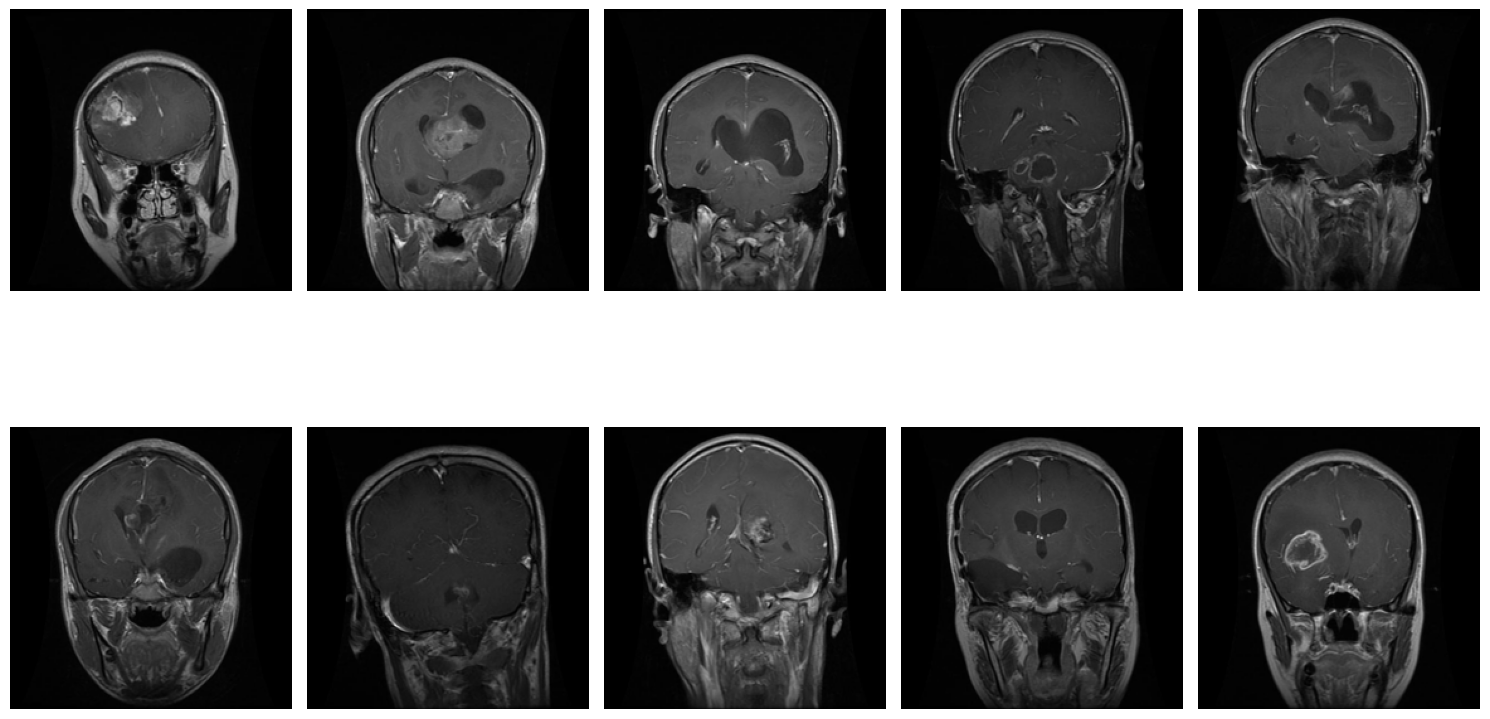

In [5]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get the current working directory
cwd = os.getcwd()

# Construct the path to the image directory
image_dir = os.path.join(cwd, 'Training','glioma')

# Use glob to get all image files with common image extensions
image_paths = glob.glob(os.path.join(image_dir, '*.*'))
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display only the first 9 images
num_images_to_display = 10
image_paths_to_display = image_paths[:num_images_to_display]

# Display the images with larger size
num_images = len(image_paths_to_display)
images_per_row = 5# Reduce the number of images per row to increase individual image size
num_rows = num_images // images_per_row + (num_images % images_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Increase the figure size
for i, image_path in enumerate(image_paths_to_display):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to a smaller size
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Non cancerous brain tumor images

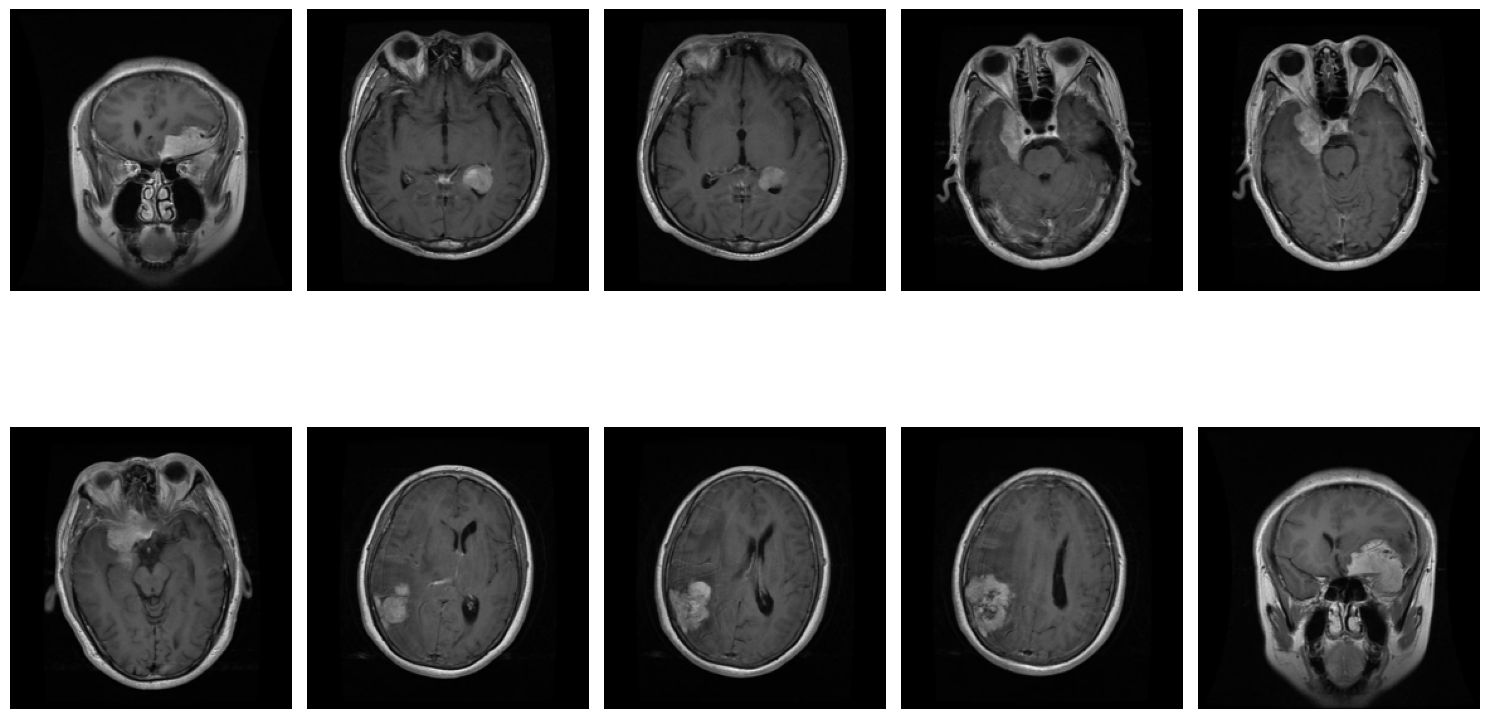

In [6]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get the current working directory
cwd = os.getcwd()

# Construct the path to the image directory
image_dir = os.path.join(cwd, 'Training','meningioma')

# Use glob to get all image files with common image extensions
image_paths = glob.glob(os.path.join(image_dir, '*.*'))
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display only the first 9 images
num_images_to_display = 10
image_paths_to_display = image_paths[:num_images_to_display]

# Display the images with larger size
num_images = len(image_paths_to_display)
images_per_row = 5  # Reduce the number of images per row to increase individual image size
num_rows = num_images // images_per_row + (num_images % images_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Increase the figure size
for i, image_path in enumerate(image_paths_to_display):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to a smaller size
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Images of brain with no tumor

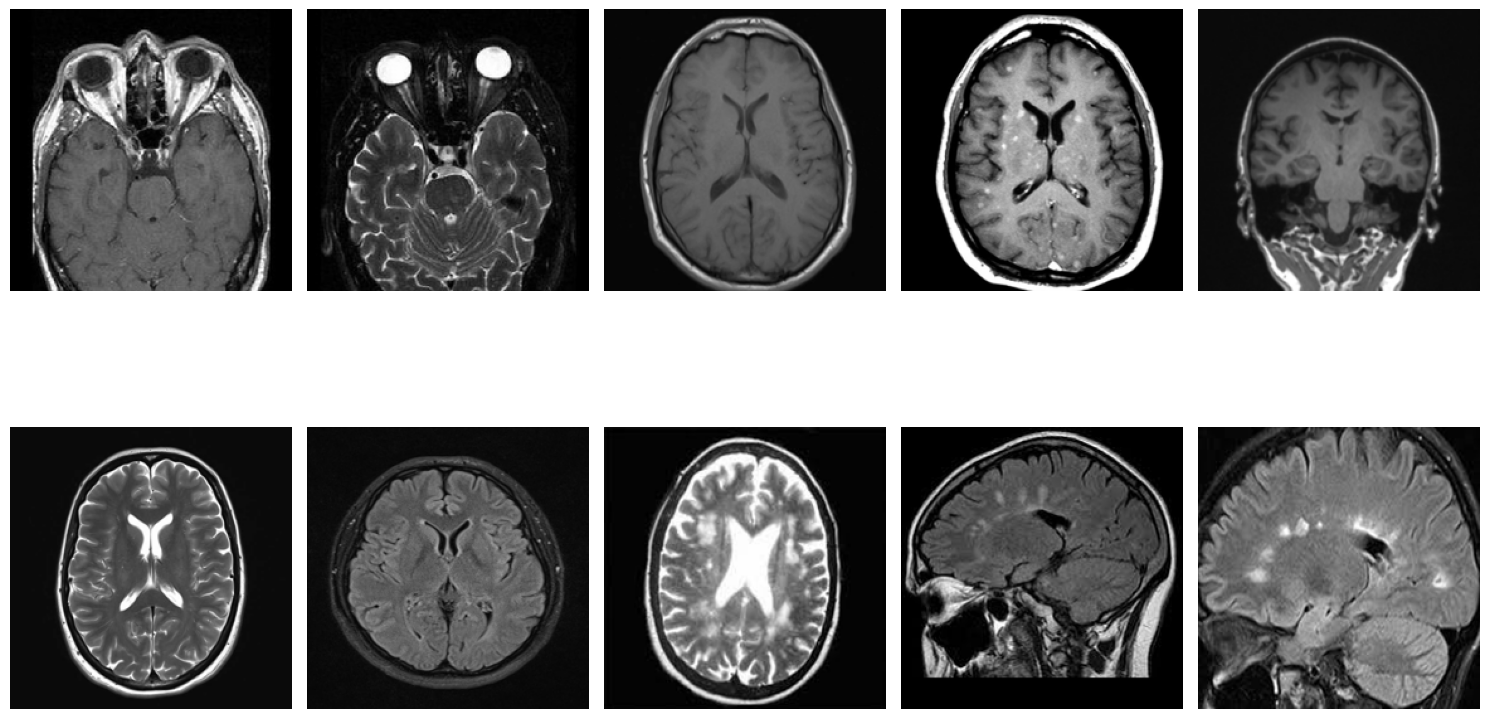

In [7]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get the current working directory
cwd = os.getcwd()

# Construct the path to the image directory
image_dir = os.path.join(cwd, 'Training','notumor')

# Use glob to get all image files with common image extensions
image_paths = glob.glob(os.path.join(image_dir, '*.*'))
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display only the first 9 images
num_images_to_display = 10
image_paths_to_display = image_paths[:num_images_to_display]

# Display the images with larger size
num_images = len(image_paths_to_display)
images_per_row = 5  # Reduce the number of images per row to increase individual image size
num_rows = num_images // images_per_row + (num_images % images_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Increase the figure size
for i, image_path in enumerate(image_paths_to_display):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to a smaller size
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


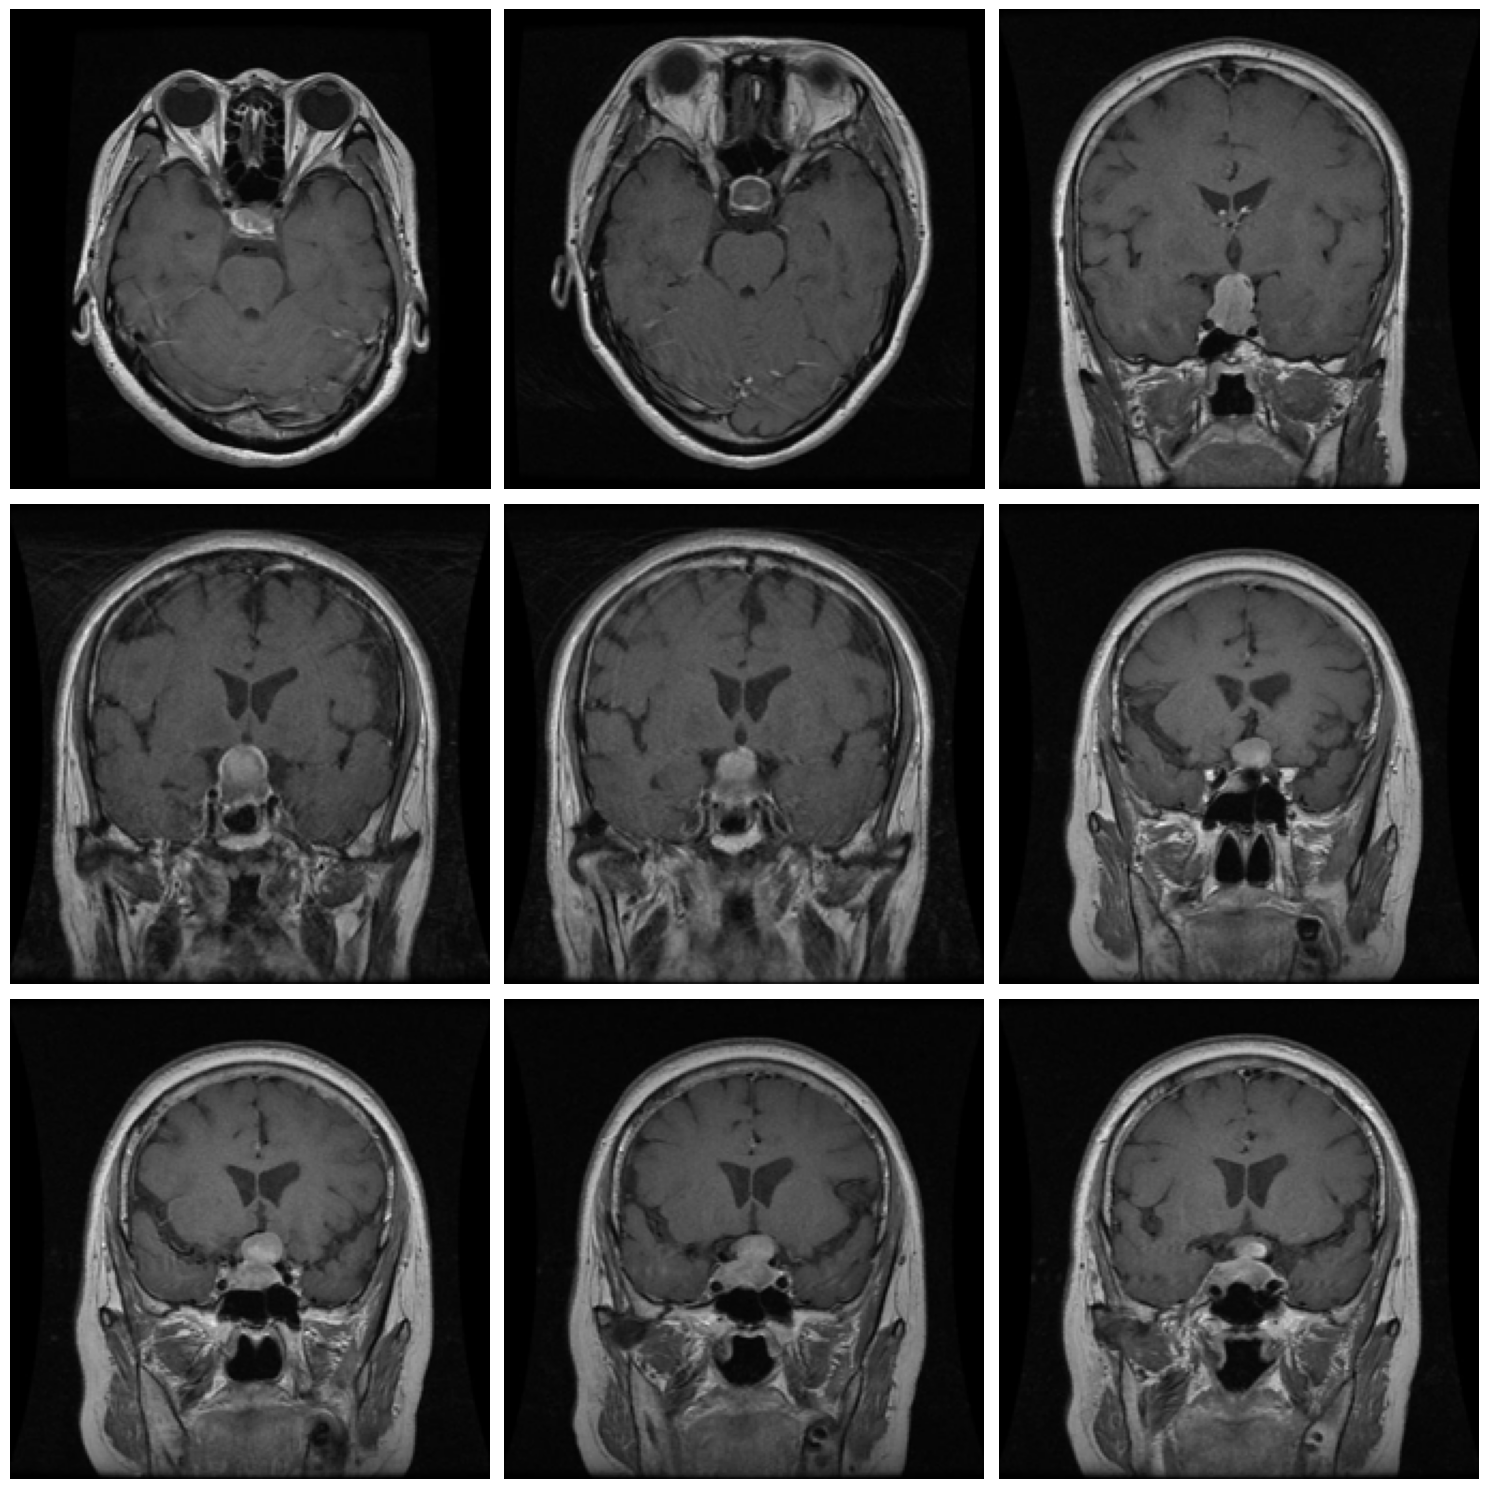

In [10]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get the current working directory
cwd = os.getcwd()

# Construct the path to the image directory
image_dir = os.path.join(cwd, 'Training','pituitary')

# Use glob to get all image files with common image extensions
image_paths = glob.glob(os.path.join(image_dir, '*.*'))
image_paths = [path for path in image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display only the first 9 images
num_images_to_display = 9
image_paths_to_display = image_paths[:num_images_to_display]

# Display the images with larger size
num_images = len(image_paths_to_display)
images_per_row = 3  # Reduce the number of images per row to increase individual image size
num_rows = num_images // images_per_row + (num_images % images_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Increase the figure size
for i, image_path in enumerate(image_paths_to_display):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to a smaller size
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64


In [12]:
import os
import glob
import cv2
import numpy as np
import pandas as pd

# Specify the directory containing the images
path = 'C:\\Users\\user\\Downloads\\Training'
classes = os.listdir(path)
print(classes)

# Initialize lists for images and labels
X = []
Y = []
IMG_SIZE = 224  # Example image size, change as needed

for i, cat in enumerate(classes):
    images = glob.glob(f'{path}/{cat}/*.jpeg')
    
    for image in images:
        img = cv2.imread(image)
        
        if img is not None:
            X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
            Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

# Print shapes to verify
print("Shape of X:", X.shape)
print("Shape of one-hot encoded Y:", one_hot_encoded_Y.shape)


['glioma', 'meningioma', 'notumor', 'pituitary']
Shape of X: (0,)
Shape of one-hot encoded Y: (0, 0)


In [13]:
model = keras.models.Sequential([
	layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(3, activation='softmax')
])


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,819,971 (98.50 MB)

 Trainable params: 25,819,203 (98.49 MB)

 Non-trainable params: 768 (3.00 KB)

# Key Components
1)Layer (type):
This column lists the different types of layers in the model, such as Conv2D, MaxPooling2D, Flatten, Dense, and BatchNormalization.
2)Output Shape:
This column describes the shape of the output produced by each layer. The shape is typically represented as (batch_size, height, width, channels) for convolutional layers, where:
batch_size: Number of input samples processed simultaneously (often unspecified, hence "None").
height: The height of the output feature maps.
width: The width of the output feature maps.
channels: Number of filters or output channels.
3)Param #:
This column indicates the number of trainable parameters in each layer. These parameters include weights and biases used in the calculations for each layer.

# Layer Breakdown
1)Conv2D Layers:
These layers perform convolution operations on the input data. The number of filters determines how many feature maps are created. The output shape changes based on the filter size and padding.

2)MaxPooling2D Layers:
These layers down-sample the feature maps, reducing their spatial dimensions while retaining the most important information. They do not have trainable parameters.

3)Flatten Layer:
This layer converts the multi-dimensional output of the previous layer into a one-dimensional vector, which is necessary before passing data to fully connected (Dense) layers.

4)Dense Layers:
These layers are fully connected layers where each neuron is connected to all neurons in the previous layer. The number of units in the Dense layer represents the number of neurons, and they have a significant number of parameters.

5)BatchNormalization Layers:
These layers normalize the output of the previous layer, which can help stabilize and speed up training.

6)Dropout Layer:
This layer randomly sets a fraction of its input units to 0 during training, which helps to prevent overfitting.

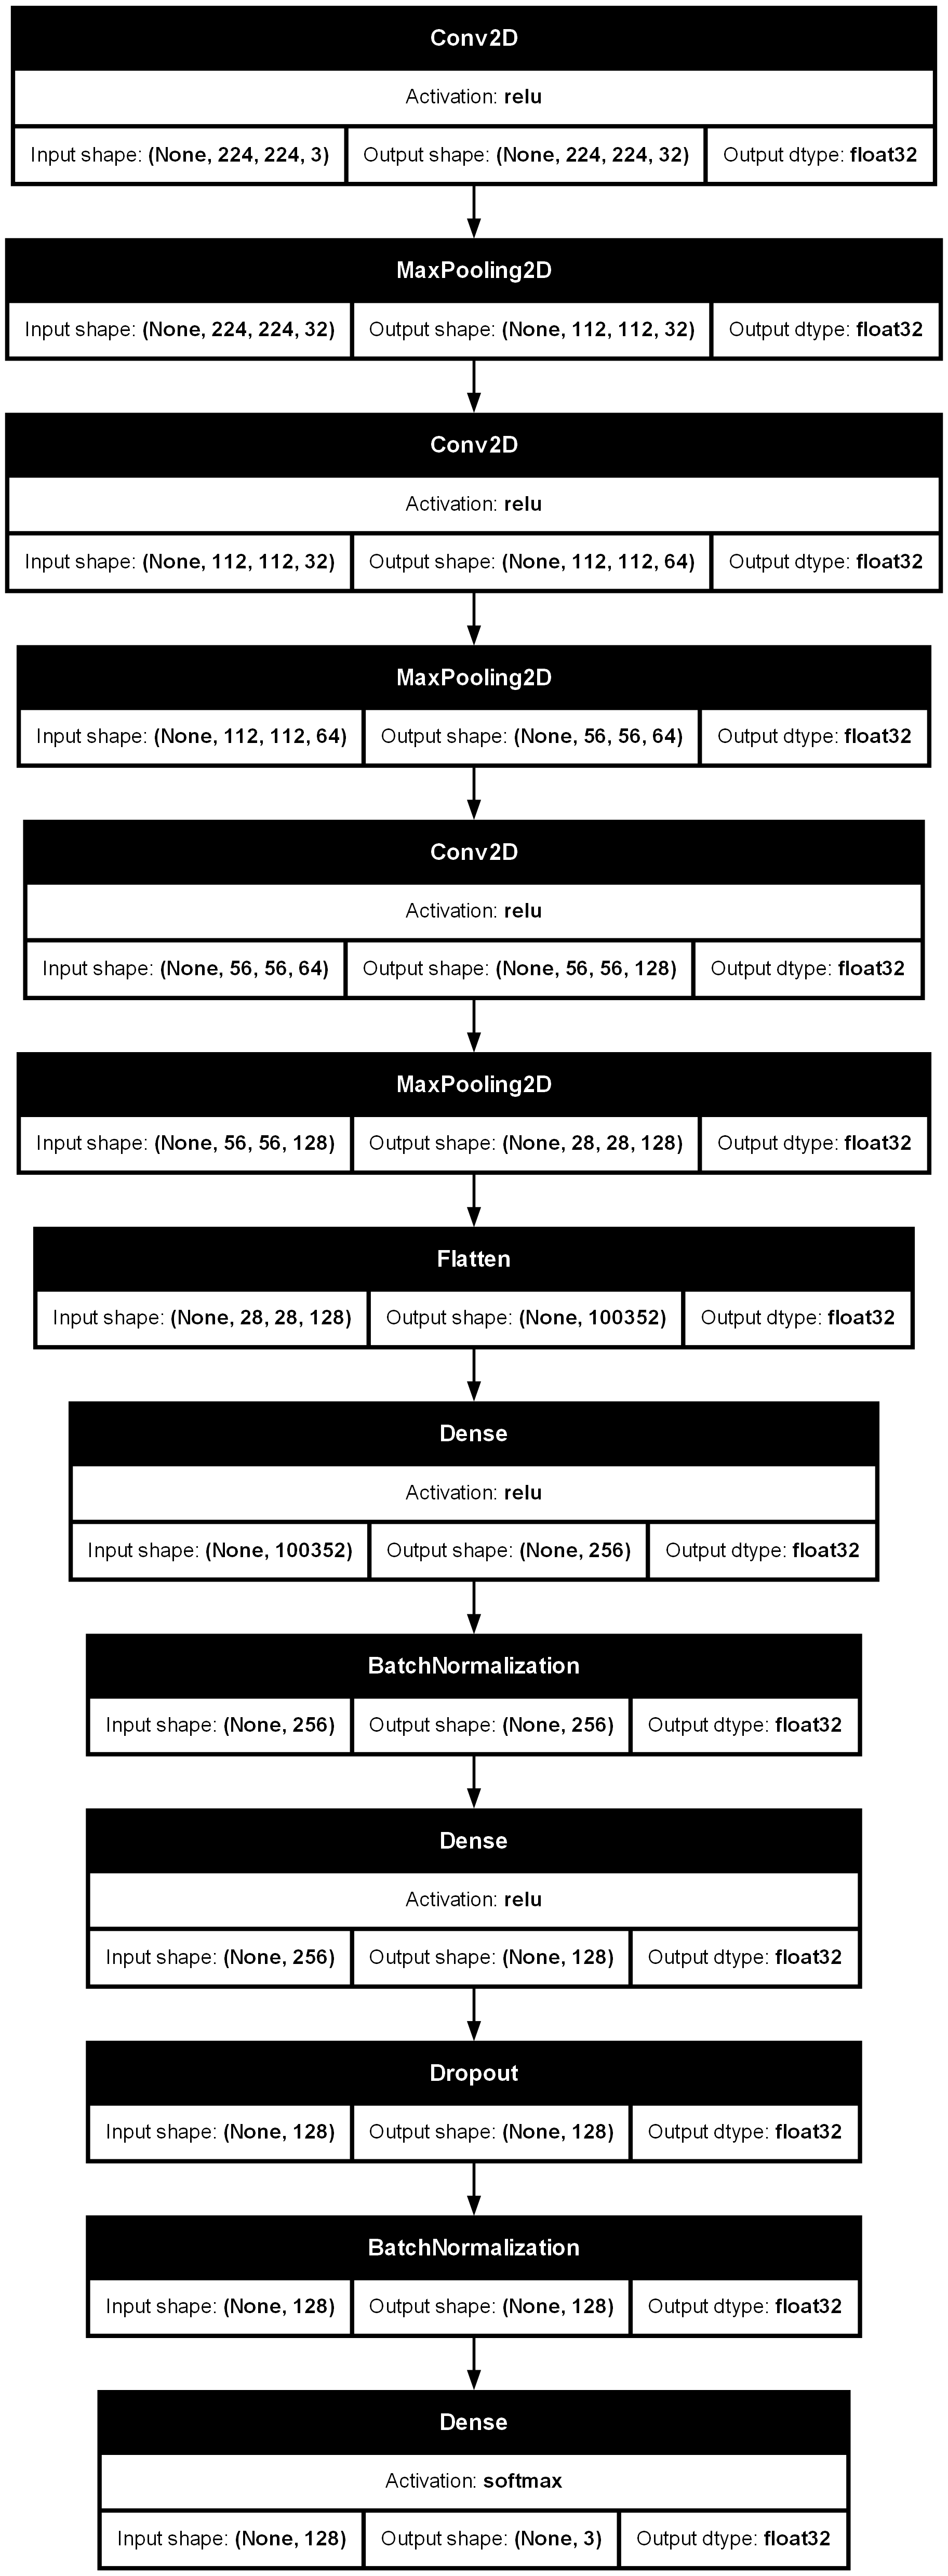

In [15]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [16]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)


In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_accuracy') > 0.90:
			print('\n Validation accuracy has reached upto \
					90% so, stopping further training.')
			self.model.stop_training = True


es = EarlyStopping(patience=3,
				monitor='val_accuracy',
				restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)


Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 139s 934ms/step - accuracy: 0.5937 - loss: 1.2234 - val_accuracy: 0.7375 - val_loss: 0.7475 - learning_rate: 0.0010
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 127s 887ms/step - accuracy: 0.7586 - loss: 0.6637 - val_accuracy: 0.7209 - val_loss: 0.6672 - learning_rate: 0.0010
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 121s 842ms/step - accuracy: 0.8317 - loss: 0.4773 - val_accuracy: 0.8434 - val_loss: 0.4079 - learning_rate: 0.0010
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 830ms/step - accuracy: 0.8628 - loss: 0.3972 - val_accuracy: 0.7314 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 117s 816ms/step - accuracy: 0.8978 - loss: 0.3070 - val_accuracy: 0.2835 - val_loss: 4.0542 - learning_rate: 0.0010
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 117s 816ms/step - accuracy: 0.9077 - loss: 0.2666 - val_accuracy: 0.9073 - val_loss: 0.2307 - learning_rate: 0.0010
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 807ms/step - accura

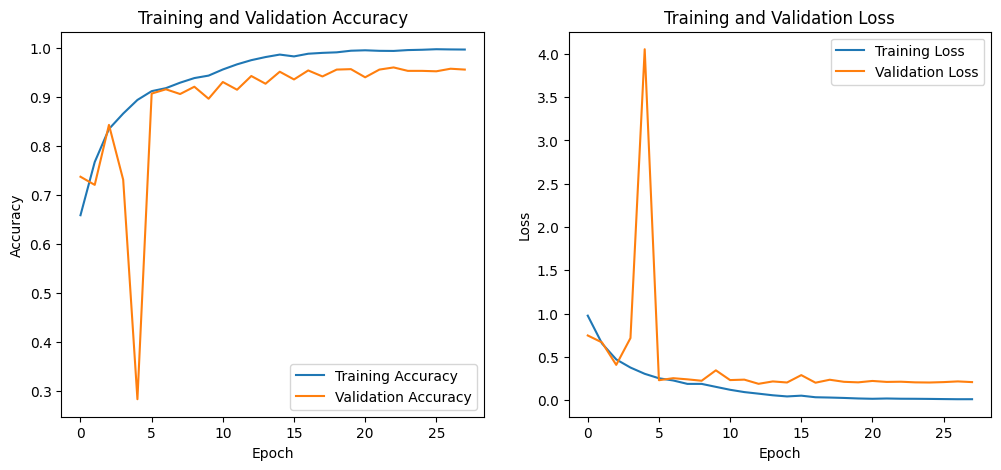

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical

# Load data
data_path = 'C:\\Users\\user\\BrainTumour\\Training'
classes = os.listdir(data_path)
X = []
Y = []

for i, class_name in enumerate(classes):
    images = os.listdir(os.path.join(data_path, class_name))
    for image_name in images:
        image_path = os.path.join(data_path, class_name, image_name)
        image = cv2.imread(image_path)  # Load image using OpenCV
        image = cv2.resize(image, (224, 224))  # Resize image to a consistent shape
        X.append(image)
        Y.append(i)

X = np.array(X)
Y = np.array(Y)

# Preprocess data
X = X.astype('float32') / 255.0
Y = to_categorical(Y, num_classes=len(classes))

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Train model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30, batch_size=32, callbacks=[es, lr])

# Evaluate model
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(Y_val, Y_pred, target_names=classes))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_val, Y_pred))

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [21]:
import os
import cv2
import numpy as np

# Define the path to the testing set folder
testing_set_path = 'C:\\Users\\user\\Downloads\\Testing'

# Initialize lists to store images and labels
X_test = []
Y_test = []

# Desired image size (e.g., 224x224)
IMG_SIZE = 224

# Get the list of classes (subfolders)
classes = os.listdir(testing_set_path)

# Iterate over each class
for class_name in classes:
    # Get the path to the current class folder
    class_path = os.path.join(testing_set_path, class_name)
    # Get the list of image files in the class folder
    image_files = os.listdir(class_path)
    # Iterate over each image in the class folder
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            # Resize the image to the desired size
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            # Append the image to X_test
            X_test.append(image)
            # Append the label to Y_test
            Y_test.append(classes.index(class_name))  # Assuming class folders are named numerically or alphabetically

# Convert lists to numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Optionally, preprocess the images (e.g., normalize pixel values)
X_test = X_test / 255.0  # Normalize the pixel values to [0, 1]

# Now, X_test and Y_test contain the testing set data and labels, respectively


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9145 - loss: 0.3791
Test Loss: 0.24076171219348907
Test Accuracy: 0.9450801014900208
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       300
           1       0.87      0.90      0.89       306
           2       0.96      1.00      0.98       405
           3       0.98      0.99      0.99       300

    accuracy                           0.95      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.95      0.94      1311

Confusion Matrix:
[[262  37   0   1]
 [ 10 276  16   4]
 [  0   0 405   0]
 [  1   3   0 296]]


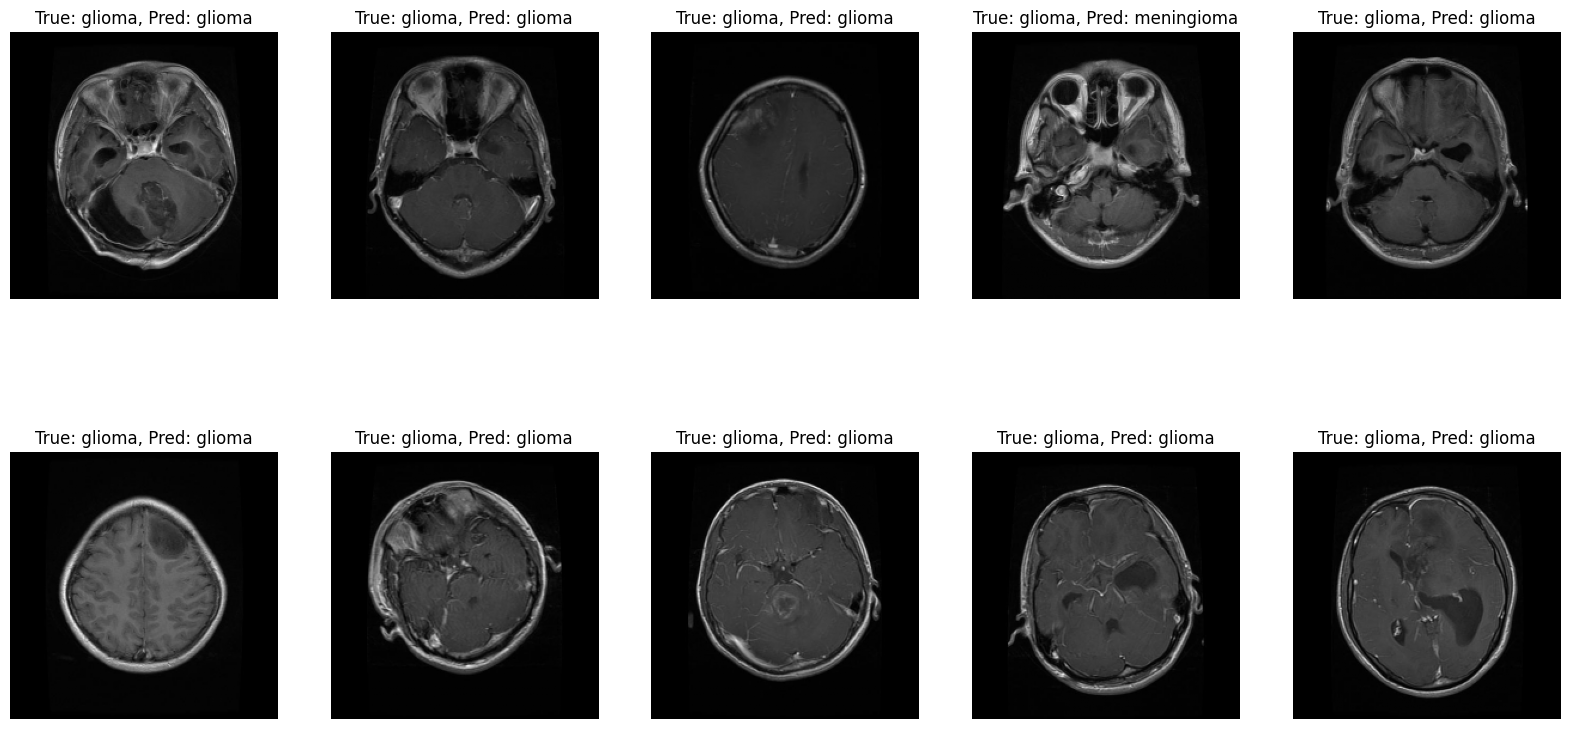

In [25]:
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# One-hot encode Y_test
Y_test_one_hot = to_categorical(Y_test, num_classes=len(classes))

# Make predictions on testing set
Y_pred = model.predict(X_test)
# Convert predictions to class labels
Y_pred_class = np.argmax(Y_pred, axis=1)

# Evaluate model performance on testing set
test_loss, test_accuracy = model.evaluate(X_test, Y_test_one_hot)

# Compute additional evaluation metrics (e.g., precision, recall, F1-score)
test_classification_report = classification_report(Y_test, Y_pred_class)

# Print evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(test_classification_report)

# Visualize results (optional)
# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can visualize some predictions
import matplotlib.pyplot as plt

# Function to display images with their predicted and true labels
def display_images(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}, Pred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the first 10 images with their true and predicted labels
display_images(X_test, Y_test, Y_pred_class, classes, num_images=10)


# Conclusions
Test Loss and Accuracy
Test Loss: 0.2408
A relatively low test loss indicates that the model's predictions are close to the actual labels, suggesting effective learning.
Test Accuracy: 0.9451 (approximately 94.5%)
This high accuracy means that the model correctly classified about 94.5% of the test samples, which is impressive, especially for a multi-class classification task.
Classification Report
The classification report provides detailed insights into the model's performance across different classes:

# Precision, Recall, F1-Score,macro average:

Class 0: High precision (0.96) and decent recall (0.87) indicate that while the model is good at identifying Class 0, it does miss some true instances (lower recall).
Class 1: Moderate precision (0.87) and high recall (0.90) suggest that the model is slightly better at identifying Class 1 instances than misclassifying them.
Class 2: Exceptional performance with a precision of 0.96 and a perfect recall of 1.00, meaning the model correctly identifies all instances of Class 2 without any false positives.
Class 3: Also shows outstanding precision (0.98) and recall (0.99), indicating high reliability in classifying this category.
Macro Average:

The macro averages of precision, recall, and F1-score (all around 0.94) reflect balanced performance across all classes, with no class significantly underperforming.
Weighted Average:

The weighted averages (0.95 for precision and recall) consider the support (number of true instances) of each class, indicating that the model performs well overall, particularly on larger classes.

# Overall Assessment
The model is performing exceptionally well, with high accuracy and low loss, suggesting that it generalizes effectively to unseen data.
The classification report indicates that while the model is robust across classes, there is room for improvement in Class 0’s recall. Focusing on further optimizing this could enhance the model's overall performance.